# MS Proteomics Experiment — Final Notebook

This notebook demonstrates a complete end-to-end proteomics workflow using the `proteosim` package. It includes steps for reading FASTA files, digesting proteins, predicting LC retention times, and simulating mass spectra.

## How to Use `proteosim`

This section guides you through what your package enables and how to get started with it,
  
  - **Load protein sequences** from FASTA files using `read_fasta`. This gives a dictionary of protein IDs to sequences.
  - **Digest proteins** with `digest_protein_collection` and explore the peptides generated by common proteases like trypsin.
  - **Calculate sequence coverage** with `compute_sequence_coverage` to see which portions of a protein are observed after digestion.
  - **Predict liquid chromatography (LC) retention times** for peptides using `predict_lc_retention_times` and visualize chromatographic profiles with `plot_retention_time`.
  - **Select peptides by retention-time window** to focus on regions of interest using `select_retention_time_window`.
  - **Simulate mass spectrometry (MS)** data:
    - Compute molecular masses with `calculate_mol_mass_collection`
    - Compute m/z values with `calculate_mz_collection`
    - Plot MS1 spectra with `plot_ms`
    - Fragment peptides and plot MS2 spectra using `fragment_peptide`

## 1. Setup

Import the package and standard libraries. Make sure your virtual environment has all dependencies installed (`numpy`, `pandas`, `matplotlib`, `pyteomics`).

In [3]:
import proteosim as ps

## 2. Load Protein Sequences

In [ ]:
# clean function call
ps.read_fasta(fasta_file)

NameError: name 'fasta_file' is not defined

Here is an example to show how to use the functions.

In [4]:
# Path to your example FASTA file
fasta_file = "data/sample_proteins.fasta"
# Read protein sequences
proteins = ps.read_fasta(fasta_file)
print(f'Loaded {len(proteins)} proteins.')
list(proteins.keys())[:5]

Loaded 3 proteins.


['P11802', 'A0A087WTH1', 'A0A087WTH5']

## 3. Protein Digestion

Digest the protein sequences using a protease (e.g., trypsin) and compute sequence coverage for a selected protein.

In [6]:
# clean function calls
ps.digest_protein_sequence(protein_seq, cleave_pattern, min_pep_len=5, max_pep_len=30)
ps.digest_protein_collection(protein_map, cleave_pattern, min_pep_len = 5, max_pep_len = 30)
ps.compute_sequence_coverage(protein_seq, peptide_list)
# The variable enzyme_cleavage_patterns contains the cleavage_patterns of LysC, LysN, ArgC and Trypsin.
ps.enzyme_cleavage_patterns

NameError: name 'protein_seq' is not defined

Here is an example to show how to use the functions. 

In [5]:
# Digest protein sequnce
protein_seq = list(proteins.values())[0]
digested_protein_seq = ps.digest_protein_sequence(protein_seq, cleave_pattern = ps.enzyme_cleavage_patterns["Trypsin"], min_pep_len=5, max_pep_len=30)

In [6]:
# Digest all proteins
digested_peptides = ps.digest_protein_collection(proteins, cleave_pattern = ps.enzyme_cleavage_patterns["Trypsin"], min_pep_len=5, max_pep_len=30)

# Preview peptides for one protein\n",
protein_id = list(digested_peptides.keys())[0]
print(f'Peptides for {protein_id}', digested_peptides[protein_id])

# Compute coverage,
coverage = ps.compute_sequence_coverage(proteins[protein_id], digested_peptides[protein_id])
print(f'Sequence coverage for {protein_id}: {coverage:.2%}')

Peptides for P11802 ['MATSR', 'YEPVAEIGVGAYGTVYK', 'DPHSGHFVALK', 'VPNGGGGGGGLPISTVR', 'EVALLR', 'LEAFEHPNVVR', 'LMDVCATSR', 'VTLVFEHVDQDLR', 'TYLDK', 'APPPGLPAETIK', 'GLDFLHANCIVHR', 'DLKPENILVTSGGTVK', 'LADFGLAR', 'IYSYQMALTPVVVTLWYR', 'APEVLLQSTYATPVDMWSVGCIFAEMFR', 'KPLFCGNSEADQLGK', 'IFDLIGLPPEDDWPR', 'DVSLPR', 'GAFPPR', 'GPRPVQSVVPEMEESGAQLLLEMLTFNPHK', 'ISAFR', 'ALQHSYLHK', 'DEGNPE']
Sequence coverage for P11802: 9273.93%


## 4. Predict Liquid Chromatography Retention Times

Predict relative retention times for peptides and visualize the chromatographic profile.

In [ ]:
# clean function calls
ps.predict_lc_retention_times(peptides)
ps.plot_retention_time(retention_times, resolution=30)
ps.select_retention_time_window(peptide_rt_map, lower_ret_time, upper_ret_time)

Here is an example to show how to use the functions.

The retention time of you peptide MATSR is 8.9
The retention time of you peptide YEPVAEIGVGAYGTVYK is 42.7
The retention time of you peptide DPHSGHFVALK is 29.0


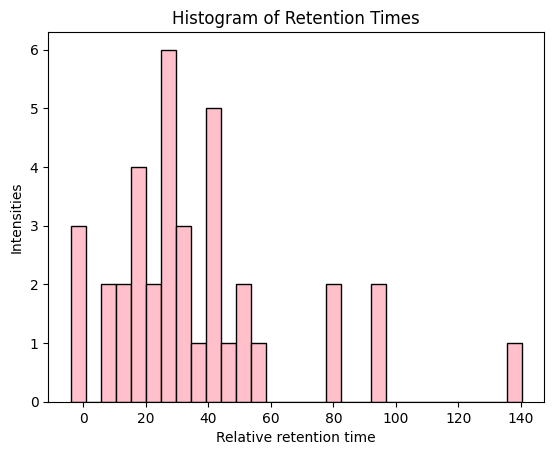

Number of peptides in retention window: 14


In [19]:
# Flatten all peptides into a single list
all_peptides = [pep for pep_list in digested_peptides.values() for pep in pep_list]

# Predict retention times
ret_times = ps.predict_lc_retention_times(all_peptides)
for key, value in list(ret_times.items())[:3]:
    print(f'The retention time of you peptide {key} is {value}')

# Plot chromatogram
ps.plot_retention_time(ret_times.values(), 30)

# Select a retention time window of interest
lower_ret_time = 10
upper_ret_time = 30
rt_window = ps.select_retention_time_window(ret_times, lower_ret_time, upper_ret_time)
filtered_peptides = [pep for pep, rt in ret_times.items() if lower_ret_time <= rt <= upper_ret_time]
print(f'Number of peptides in retention window: {len(filtered_peptides)}')

## 5. Mass Spectra Simulation

Compute molecular masses, m/z values, and plot MS1 spectra. Then fragment selected peptides for MS2.

In [ ]:
# clean function calls
ps. 
ps. 
ps. 
ps. 

Here is an example to show how to use the functions.

In [ ]:
# Calculate masses and m/z values\n",
mass_dict = ps.calculate_mol_mass_collection(filtered_peptides)
mz_dict = ps.calculate_mz_collection(filtered_peptides)

# Plot MS1 spectrum
ps.plot_ms(mz_dict)

# Fragment a single peptide for MS2\n",
peptide = filtered_peptides[0]\n",
fragments = ps.fragment_peptide(peptide)
ps.plot_ms(fragments, title=f'MS2 Spectrum of {peptide}')

## End of the Notebook

This concludes the example workflow using `proteosim`.
You can now use the package to analyze your own protein FASTA files, simulate peptide digestion, predict retention times, and generate mass spectra for further proteomics studies.